### Introduction

This project dataset contains transactions data fraud or non-fraud and other information related to each transaction

The goals for this project are:

1)Explore dataset and give findings about what features largely indicates a transaction is fraud

2)Create different models to successfully detect fraud transactions. 

### Important packages

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
# Data Manipulation

import numpy as np 
import pandas as pd
from pandas import DataFrame
# Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
import scipy.stats as stats

### Load Data and Preview data

In [4]:
#reading the two data sets and merging them into a single data frame
#22 columns and is_fraud is target variable
df1_1 = pd.read_csv("fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head(10)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
#inspecting data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [6]:
#check null values, no null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Data Cleaning

In [7]:
# transform the object date to datetime date
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,Tuesday,January
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,Tuesday,January
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,Tuesday,January
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,Tuesday,January
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,Tuesday,January


In [8]:
print('The starting time of this transaction table is {}'.format(min(df['trans_date_trans_time'])))
print('The ending time of this transaction table is {}'.format(max(df['trans_date_trans_time'])))

The starting time of this transaction table is 2019-01-01 00:00:18
The ending time of this transaction table is 2020-12-31 23:59:34


In [11]:
#calculate age based on dob
df['age'] = np.round((df['trans_date'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0         31.0
1         41.0
2         57.0
3         52.0
4         33.0
          ... 
555714    55.0
555715    21.0
555716    39.0
555717    55.0
555718    28.0
Name: age, Length: 1852394, dtype: float64

In [12]:
#Age group with count 
df['age_group'] = pd.cut(df['age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df['age_group'].value_counts(ascending=False)

40-50         431748
30-40         415701
60 - Above    383627
20-30         302408
50-60         263985
10-20          54925
Name: age_group, dtype: int64

### Seperate Numerical and Categorical Variables for future creating dummy variables

In [13]:
# Seperate Numerial columns 
num = df.select_dtypes(exclude=['object','datetime64[ns]','category'])
num.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,31.0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,41.0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,57.0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,52.0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,33.0


In [14]:
numer_col = df [["amt","zip","lat","long","city_pop","unix_time","merch_lat","merch_long","is_fraud"]]
numer_col.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [15]:
# Seperate Categorical columns 
categorical_col = df.select_dtypes(exclude=['int64','datetime64[ns]','float'])
categorical_col.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num,trans_day,trans_month,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,Tuesday,January,30-40
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,Tuesday,January,40-50
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,Tuesday,January,50-60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,Tuesday,January,50-60
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,Tuesday,January,30-40


### EDA and Feature Engineering

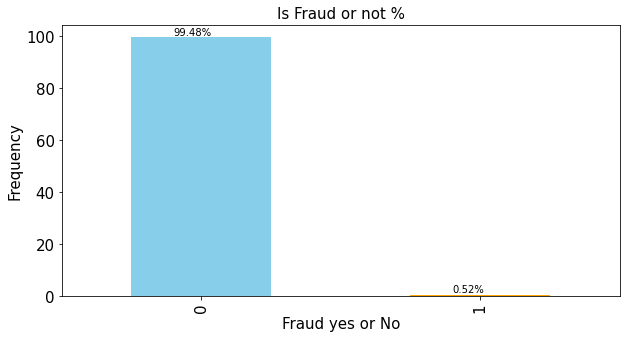

In [17]:
#check for fraud frequency
fig, ax = plt.subplots(figsize = (10,5))
(df['is_fraud'].value_counts() / len(df)*100).sort_index().plot(kind = 'bar',color =['skyblue','orange'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
ax.set_yticks(np.arange(0, 110, 20))
plt.xlabel('Fraud yes or No', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Is Fraud or not %", fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

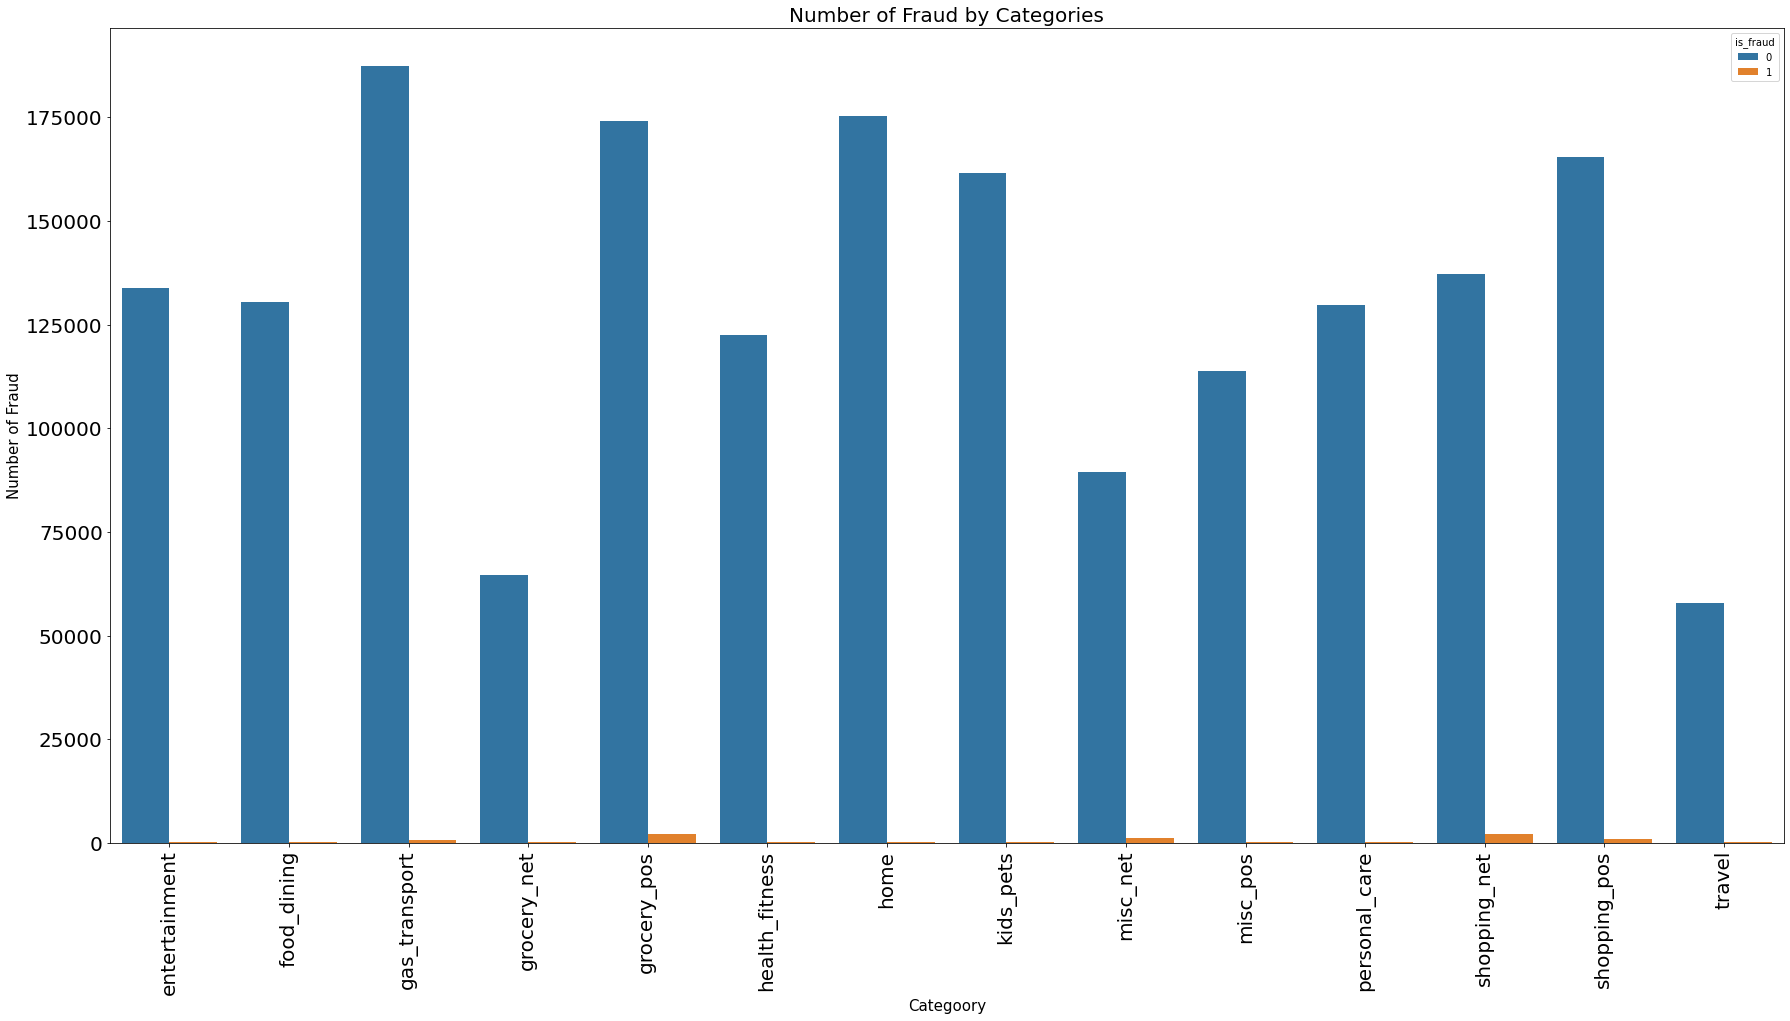

In [18]:
#visualize fraud with categories
plt.figure(figsize=(30,15))
sns.barplot(x="category", y='cc_num' ,hue="is_fraud", 
            data=df.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())
plt.xlabel('Categoory', fontsize = 15)
plt.ylabel('Number of Fraud', fontsize = 15)
plt.title("Number of Fraud by Categories", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

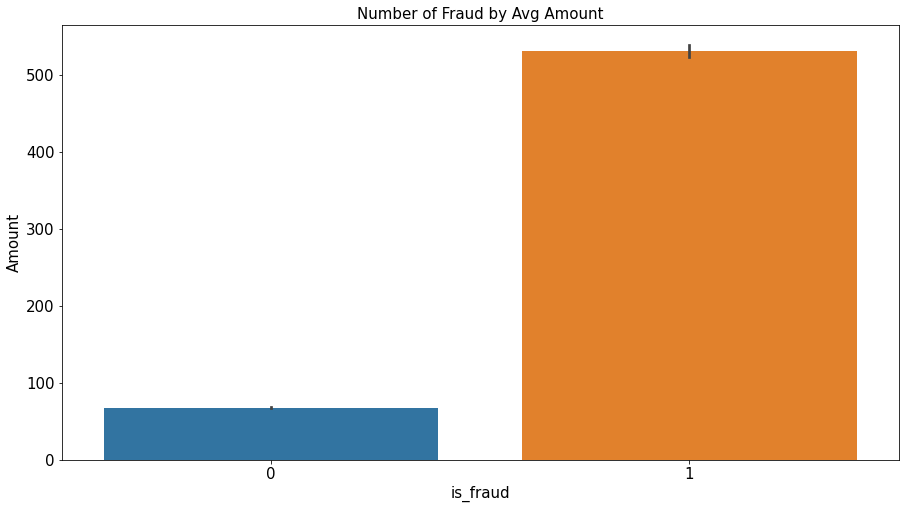

In [19]:
#fraud with amount
plt.figure(figsize=(15,8))
sns.barplot(x="is_fraud", y='amt', data=df)
plt.xlabel('is_fraud', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title("Number of Fraud by Avg Amount", fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

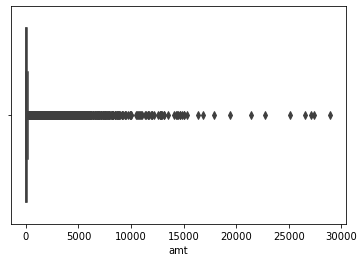

In [20]:
res = sns.boxplot(x=df["amt"])
plt.show()

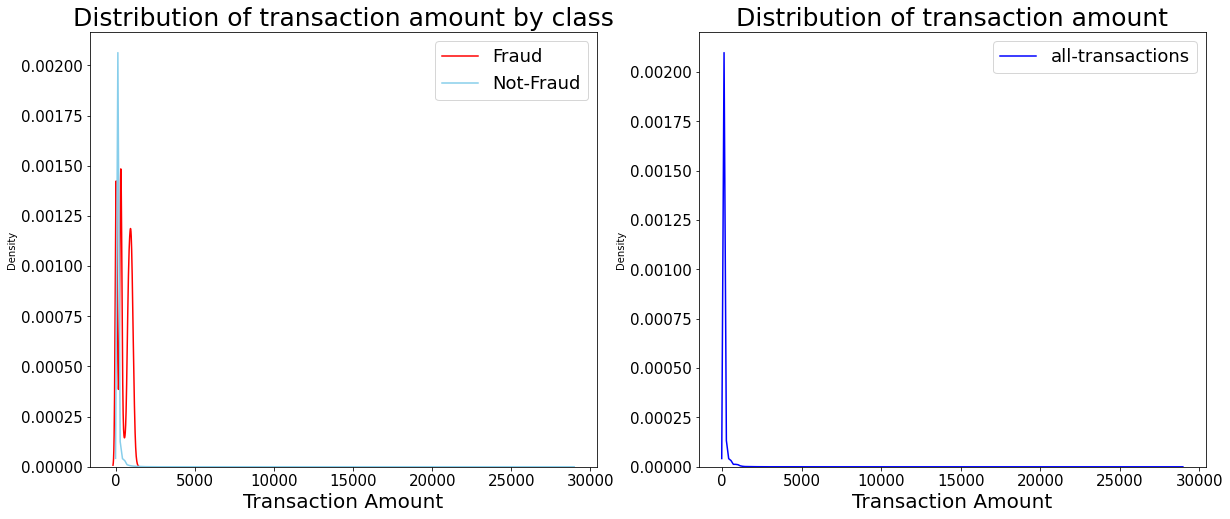

In [21]:
# Create two seperate dataframes for both fraud and not-fraud 
fraud_df, not_fraud_df = df.loc[df['is_fraud'] == True].copy(), df.loc[df['is_fraud'] == False].copy()

# Draw the histogram of 'transactionAmount'
fig, axes = plt.subplots(1,2, figsize=(20 ,8))
sns.distplot(fraud_df['amt'], hist=False, rug=False, 
             label='Fraud', ax=axes[0], color = 'red')
sns.distplot(not_fraud_df['amt'], hist=False, rug=False, 
             label='Not-Fraud', ax=axes[0], color = 'skyblue')
axes[0].set_title('Distribution of transaction amount by class', fontsize = 25)
axes[0].set_xlabel('Transaction Amount', fontsize = 20)
axes[0].legend(prop = dict(size = 18))
axes[0].tick_params(axis='both', labelsize=15)

sns.distplot(df['amt'], hist=False, rug=False,
             label = 'all-transactions', ax=axes[1], color = 'blue')
axes[1].set_title('Distribution of transaction amount', fontsize = 25)
axes[1].set_xlabel('Transaction Amount', fontsize = 20)
axes[1].legend(prop = dict(size = 18))
axes[1].tick_params(axis='both', labelsize=15)
plt.show()

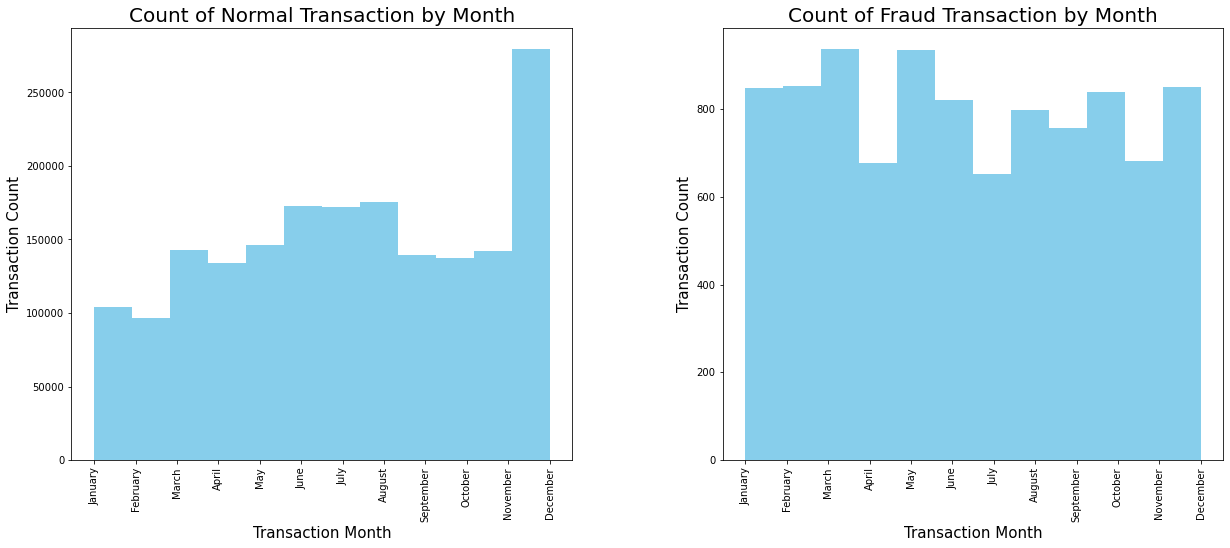

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20 ,8))
barlist = df['trans_month'].hist(by = df['is_fraud'],bins = 12,
                                       ax = axes, color = 'skyblue')
axes[0].set_title('Count of Normal Transaction by Month', fontsize = 20)
axes[0].set_xlabel('Transaction Month', fontsize = 15)
axes[0].set_ylabel('Transaction Count', fontsize = 15)

axes[1].set_title('Count of Fraud Transaction by Month', fontsize = 20)
axes[1].set_xlabel('Transaction Month', fontsize = 15)
axes[1].set_ylabel('Transaction Count', fontsize = 15)
plt.show()
#For non-fraud transactions: peak month is Dec but for fraud transactions, there area several peaks in March and May

<function matplotlib.pyplot.show(close=None, block=None)>

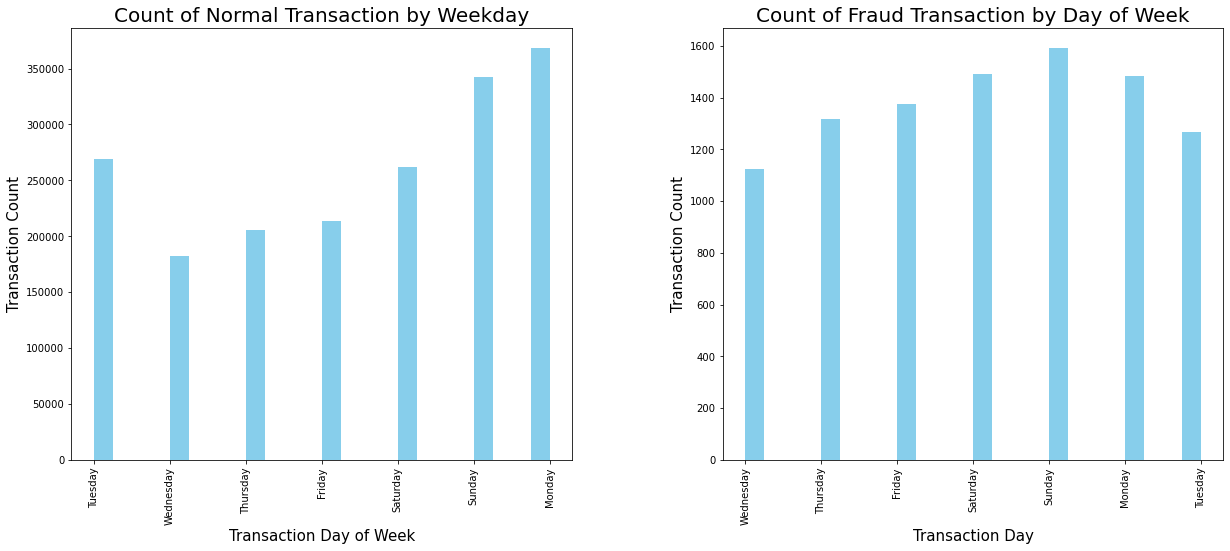

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20 ,8))
barlist = df['trans_day'].hist(by = df['is_fraud'],bins = 24,
                                       ax = axes, color = 'skyblue')
axes[0].set_title('Count of Normal Transaction by Weekday', fontsize = 20)
axes[0].set_xlabel('Transaction Day of Week', fontsize = 15)
axes[0].set_ylabel('Transaction Count', fontsize = 15)

axes[1].set_title('Count of Fraud Transaction by Day of Week', fontsize = 20)
axes[1].set_xlabel('Transaction Day', fontsize = 15)
axes[1].set_ylabel('Transaction Count', fontsize = 15)
plt.show
#Nonfraud transactions spikes on Mon but fraud transactions likely to be happened on Sun

### Scailing skewed vairables

In [24]:
#check if scaling needed
numerical_cols = [cname for cname in df.loc[:,:'amt'].columns if 
                  df[cname].dtype in ['int64','float64']]

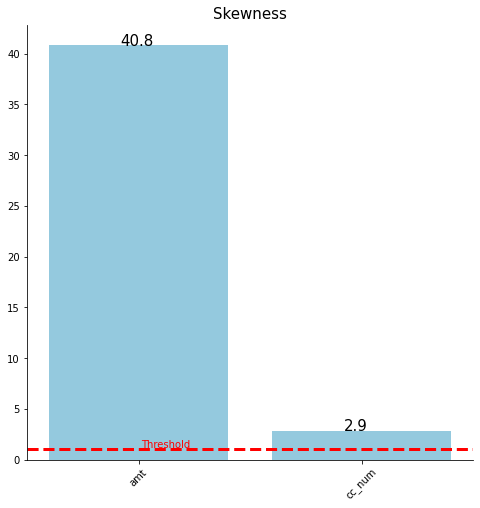

In [25]:
#In various features, it is determined that skewness greater than 1 is skewed, 
#and only these features are subjected to nonlinear scaling.
from scipy.stats import skew
plt.figure(figsize=(8, 8))
skew_features = df[numerical_cols].apply(lambda x : skew(x))
skew_features = skew_features[skew_features > 0.5].sort_values(ascending=False)
ax = sns.barplot( x =skew_features.index,y=skew_features.values,color='skyblue')
for p in ax.patches:
    height = p.get_height().round(1)
    ax.text(p.get_x()+ p.get_width()/2.5, height, height, ha = 'left', size = 15)
plt.xticks(rotation=45)
plt.text(0.01,1.2, 'Threshold',color='red')
plt.axhline(y=1, color='red', linestyle='--', linewidth=3)
plt.title('Skewness',fontsize=15)
sns.despine()
#since occ_num is not variable that we are trying to look at
#only amt need scaling

In [26]:
def check_normality(feature):
    plt.figure(figsize = (8,8))
    ax1 = plt.subplot(1,1,1)
    stats.probplot(df[feature],dist = stats.norm, plot = ax1)
    ax1.set_title(f'{feature} Q-Q plot',fontsize=20)
    sns.despine()

    mean = df['amt'].mean()
    std = df['amt'].std()
    skew = df['amt'].skew()
    print(f'{feature} : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

In [27]:
def plot_hist(feature):
    fig = px.histogram(df, x=feature, 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title_text=f"{feature} Distribution",
        title_font_color="black",
        legend_title_font_color="black",
        font_color="black",
    )
    fig.show()

In [ ]:
plot_hist("amt")
check_normality("amt")

In [29]:
df[skew_features.index] = np.log1p(df[skew_features.index])

In [ ]:
#It can be seen that the skewness has improved a lot as shown in the pictures above.
plot_hist("amt")
check_normality("amt")

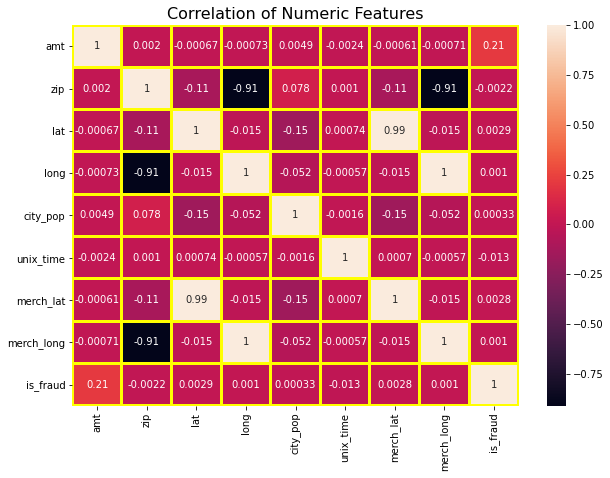

In [31]:
f , ax = plt.subplots(figsize = (10,7))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(numer_col.corr(),linewidths=2, linecolor='yellow',annot= True)
plt.show()
#amount has relationship with target is fraud or not
#merch_lat and lat, merch_long and long are positively correlated whereas merch_long and zip are negatively correlated.
#we can remove one of the correlated columns.

## Preaparation & Modeling

### 1)Create Dummy Variables

In [32]:
#create dummy variables
credit_category = df [["category","gender","age_group","trans_day","trans_month"]]
credit_dummy=pd.get_dummies(credit_category,drop_first=True)
credit_dummy.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,...,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
credit_dummy = pd.concat([df,credit_dummy],axis=1)
credit_dummy.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
0,2019-01-01 00:00:18,35.533208,"fraud_Rippin, Kub and Mann",misc_net,1.786747,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,1,0,0,0,0,0,0,0
1,2019-01-01 00:00:44,27.169657,"fraud_Heller, Gutmann and Zieme",grocery_pos,4.684259,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,1,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,31.290973,fraud_Lind-Buckridge,entertainment,5.398660,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,1,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,35.801233,"fraud_Kutch, Hermiston and Farrell",gas_transport,3.828641,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,1,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,33.559371,fraud_Keeling-Crist,misc_pos,3.760269,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,1,0,0,0,0,0,0,0


In [34]:
credit_dummy['trans_hour'] = credit_dummy['trans_date_trans_time'].dt.hour
credit_dummy['trans_date'] = credit_dummy['trans_date_trans_time'].dt.date
credit_dummy['trans_month'] = credit_dummy['trans_date_trans_time'].dt.month
credit_dummy.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September,trans_hour
0,2019-01-01 00:00:18,35.533208,"fraud_Rippin, Kub and Mann",misc_net,1.786747,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,1,0,0,0,0,0,0,0,0
1,2019-01-01 00:00:44,27.169657,"fraud_Heller, Gutmann and Zieme",grocery_pos,4.684259,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,1,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,31.290973,fraud_Lind-Buckridge,entertainment,5.398660,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,1,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,35.801233,"fraud_Kutch, Hermiston and Farrell",gas_transport,3.828641,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,1,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,33.559371,fraud_Keeling-Crist,misc_pos,3.760269,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,1,0,0,0,0,0,0,0,0


### 2)Feature Selection

In [35]:
credit_dummy.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_day', 'trans_month',
       'age', 'age_group', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'age_group_20-30', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60 - Above', 'trans_day_Monday',
       'trans_day_Saturday', 'trans_day_Sunday', 'trans_day_Thursday',
       'trans_day_Tuesday', 'trans_day_Wednesday', 'trans_month_August',
       'trans_month_December', 'trans_month_Februar

In [36]:
# Drop correlated geo features
drop_features = ['merch_lat', 'merch_long', 'zip','trans_date_trans_time',
                'cc_num', 'merchant', 'category','first', 'last', 'gender',
                 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
                'trans_num', 'unix_time','age_group','trans_date','trans_month','trans_day']
# Create a new dataframe with useful features.
model_df = credit_dummy.drop(drop_features, axis = 1)

In [37]:
model_df.columns

Index(['amt', 'is_fraud', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'age_group_20-30', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60 - Above', 'trans_day_Monday',
       'trans_day_Saturday', 'trans_day_Sunday', 'trans_day_Thursday',
       'trans_day_Tuesday', 'trans_day_Wednesday', 'trans_month_August',
       'trans_month_December', 'trans_month_February', 'trans_month_January',
       'trans_month_July', 'trans_month_June', 'trans_month_March',
       'trans_month_May', 'trans_month_November', 'trans_month_October',
       'trans_month_September', 'trans_hour'],
      dtype='object')

Fraud Detection problem is a binary classification problem, fraud vs non-fraud. Since our original data is very imbalanced, if using the original dataset to build the model, the algorithms tend to assume that in most cases there are no frauds. Because even our model predict all transactions to be not fraud, the model accuracy will still to be more than 99%.

I decide to use smote methods to re-sample the original dataframe in order to have an equal amount of Fraud and Not-Fraud cases, which can help classification algorithms to better capture signals of fraud transactions.

In [38]:
y = model_df['is_fraud']
model_df.drop(['is_fraud'], inplace=True, axis=1)
X = model_df

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 39 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   age                      float64
 2   category_food_dining     uint8  
 3   category_gas_transport   uint8  
 4   category_grocery_net     uint8  
 5   category_grocery_pos     uint8  
 6   category_health_fitness  uint8  
 7   category_home            uint8  
 8   category_kids_pets       uint8  
 9   category_misc_net        uint8  
 10  category_misc_pos        uint8  
 11  category_personal_care   uint8  
 12  category_shopping_net    uint8  
 13  category_shopping_pos    uint8  
 14  category_travel          uint8  
 15  gender_M                 uint8  
 16  age_group_20-30          uint8  
 17  age_group_30-40          uint8  
 18  age_group_40-50          uint8  
 19  age_group_50-60          uint8  
 20  age_group_60 - Above     uint8  
 21  trans_day

### 3)Oversampling--SMOTE

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                                    train_size=0.7, test_size=0.3, random_state=10)

In [41]:
# SMOTE method
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

### Logistic Regression

In [44]:
clf = LogisticRegression(penalty = 'l2', random_state=10, solver='liblinear').fit(X_train_sm, y_train_sm)

In [45]:
predict_res = clf.predict(X_test)
predict_prob = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    552856
           1       0.03      0.50      0.05      2863

    accuracy                           0.91    555719
   macro avg       0.51      0.70      0.50    555719
weighted avg       0.99      0.91      0.95    555719



From Logistic Regression, we are seeing 0.52 recall, which is not very good.
So adjusting weight and then to see if there are any improvements.

In [47]:
for w in [0.5, 0.6, 0.7, 0.8, 0.9]:
  clf = LogisticRegression(penalty = 'l2',class_weight={0:1,1:w}, random_state=10, solver='liblinear').fit(X_train_sm, y_train_sm)
  predict_res = clf.predict(X_test)
  print('Current Class Weight is:',w)
  print(classification_report(y_test, predict_res))

Current Class Weight is: 0.5
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    552856
           1       0.03      0.41      0.06      2863

    accuracy                           0.94    555719
   macro avg       0.52      0.68      0.52    555719
weighted avg       0.99      0.94      0.96    555719

Current Class Weight is: 0.6
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    552856
           1       0.03      0.43      0.06      2863

    accuracy                           0.93    555719
   macro avg       0.51      0.68      0.51    555719
weighted avg       0.99      0.93      0.96    555719

Current Class Weight is: 0.7
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    552856
           1       0.03      0.46      0.06      2863

    accuracy                           0.92    555719
   macro avg       0.51      0.69      0.

Even after adjusting weight, the performance is not good

### Decision Tree

In [48]:
clf = DecisionTreeClassifier(random_state=10).fit(X_train_sm, y_train_sm)
predict_res = clf.predict(X_test)
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552856
           1       0.52      0.82      0.63      2863

    accuracy                           1.00    555719
   macro avg       0.76      0.91      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [49]:
print(confusion_matrix(y_test, predict_res))

[[550686   2170]
 [   522   2341]]


From Decision Tree model, we could see 81% of chance to predict fraud case correctly.
Because precision and recall for non-fraud cases is 100% so I checked if there is overfitting problem.
After running confusion matrix: For non-fraud cases, not exactly 100% precision and recall, so we don't have overfitting prblems.
Next step: dive deep into correctly predicted fraud cases: do we have 82% of fraud correctly dectected but all small amount? For the rest of 20% fail to detect cases, does those 20% all involve large transactions?

In [51]:
models = [RandomForestClassifier(), LogisticRegression(solver='liblinear'),DecisionTreeClassifier()]
results = []
for m in models:
    m.fit(X_train_sm, y_train_sm)
    results.append(m.predict(X_test))

### ROC curve & PR curve

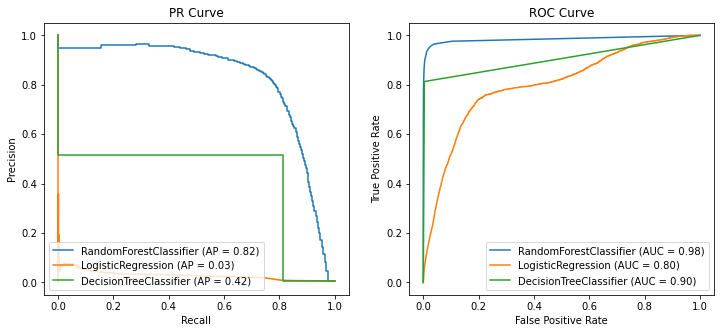

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=axes[0])
    plot_roc_curve(m, X_test, y_test, ax=axes[1])
axes[0].set_title("PR Curve"), axes[1].set_title("ROC Curve");

#### From PR curve, decision tree is not sensitive to threshold so I decide to use random forest

### Random Forest

In [53]:
clf = RandomForestClassifier(random_state=10).fit(X_train_sm, y_train_sm)
predict_res = clf.predict(X_test)
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552856
           1       0.78      0.79      0.79      2863

    accuracy                           1.00    555719
   macro avg       0.89      0.90      0.89    555719
weighted avg       1.00      1.00      1.00    555719



### Parameter tuning for random forest:

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 30, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth}

### Random Grid search

In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=2,
                               scoring = 'average_precision',random_state=10, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25, 30,
                                                      35, 40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 5, 8, 11, 14, 17,
                                                         20, 23, 26, 30]},
                   random_state=10, scoring='average_precision', verbose=2)

In [57]:
best_rf = rf_random.best_estimator_
predict_res = best_rf.predict(X_test)
predict_prob = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552856
           1       0.70      0.81      0.75      2863

    accuracy                           1.00    555719
   macro avg       0.85      0.90      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [57]:
best_rf = rf_random.best_estimator_
predict_res = best_rf.predict(X_test)
predict_prob = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552856
           1       0.70      0.81      0.75      2863

    accuracy                           1.00    555719
   macro avg       0.85      0.90      0.87    555719
weighted avg       1.00      1.00      1.00    555719



In [57]:
best_rf = rf_random.best_estimator_
predict_res = best_rf.predict(X_test)
predict_prob = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, predict_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552856
           1       0.70      0.81      0.75      2863

    accuracy                           1.00    555719
   macro avg       0.85      0.90      0.87    555719
weighted avg       1.00      1.00      1.00    555719



###### From Precision-Recall curve, we could random forest model performs bettern than decision tree and logistic regression. After tuning parameter of random forest, recall has increased to 81%--- indicates we can predict 81% of total fraud cases